In [18]:
# import all libraries before continuing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score


# Exercise 1 and 2

In [33]:
df = pd.read_csv('auto-mpg.csv')

# one hot encoding
one_hot_encoded_data = pd.get_dummies(df, columns = ['origin'])
one_hot_encoded_data

,mpg,displacement,horsepower,weight,acceleration,origin_Europe,origin_Japan,origin_USA
0,18.0,307.0,130.0,3504.0,12.0,False,False,True
1,15.0,350.0,165.0,3693.0,11.5,False,False,True
2,18.0,318.0,150.0,3436.0,11.0,False,False,True
3,16.0,304.0,150.0,3433.0,12.0,False,False,True
4,17.0,302.0,140.0,3449.0,10.5,False,False,True
...,...,...,...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6,False,False,True
388,44.0,97.0,52.0,2130.0,24.6,True,False,False
389,32.0,135.0,84.0,2295.0,11.6,False,False,True
390,28.0,120.0,79.0,2625.0,18.6,False,False,True


In [34]:
# normalize each field
columns_to_normalize = df.columns.difference(['origin'])
scaler = MinMaxScaler()
one_hot_encoded_data[columns_to_normalize] = scaler.fit_transform(one_hot_encoded_data[columns_to_normalize])
one_hot_encoded_data

,mpg,displacement,horsepower,weight,acceleration,origin_Europe,origin_Japan,origin_USA
0,0.239362,0.617571,0.456522,0.536150,0.238095,False,False,True
1,0.159574,0.728682,0.646739,0.589736,0.208333,False,False,True
2,0.239362,0.645995,0.565217,0.516870,0.178571,False,False,True
3,0.186170,0.609819,0.565217,0.516019,0.238095,False,False,True
4,0.212766,0.604651,0.510870,0.520556,0.148810,False,False,True
...,...,...,...,...,...,...,...,...
387,0.478723,0.186047,0.217391,0.333711,0.452381,False,False,True
388,0.930851,0.074935,0.032609,0.146583,0.988095,True,False,False
389,0.611702,0.173127,0.206522,0.193365,0.214286,False,False,True
390,0.505319,0.134367,0.179348,0.286929,0.630952,False,False,True


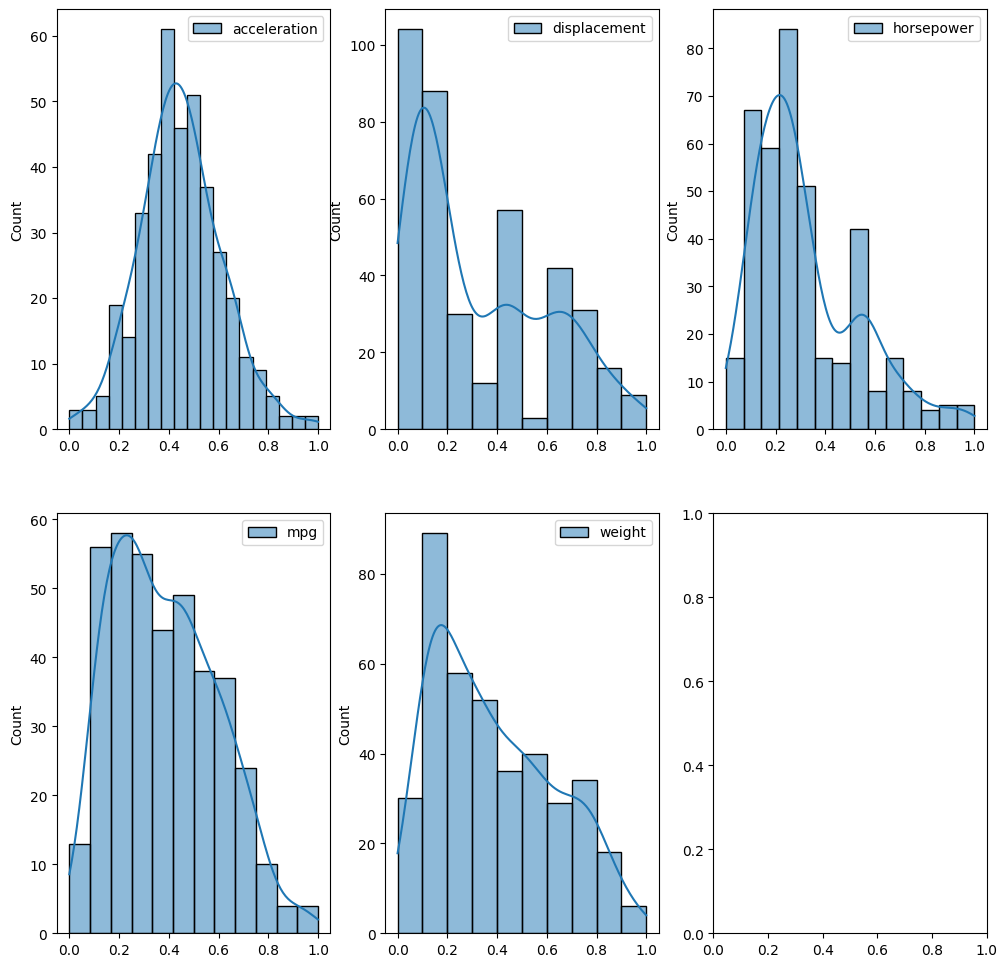

In [35]:
# plot distribution of data
fig, axes = plt.subplots(2,3, figsize=(12,12))
axes = axes.flatten()

i = 0
for item in one_hot_encoded_data[columns_to_normalize].items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

**Acceleration seems to be mostly symmetric while the rest are skewed to the right.**

In [46]:
# remove Europe
data = df.copy().loc[(df['origin'] != 'Europe'), :]
data

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA
...,...,...,...,...,...,...
386,27.0,151.0,90.0,2950.0,17.3,USA
387,27.0,140.0,86.0,2790.0,15.6,USA
389,32.0,135.0,84.0,2295.0,11.6,USA
390,28.0,120.0,79.0,2625.0,18.6,USA


In [54]:
# split dataset
train, test = train_test_split(data, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['origin']) ,train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']

In [60]:
# build logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate precision and recall for each class
precision_japan = precision_score(y_test, y_pred, pos_label='Japan')
recall_japan = recall_score(y_test, y_pred, pos_label='Japan')

precision_usa = precision_score(y_test, y_pred, pos_label='USA')
recall_usa = recall_score(y_test, y_pred, pos_label='USA')

print(f'Precision for Japan: {round(precision_japan, 4)}')
print(f'Recall for Japan: {round(recall_japan, 4)}')

print(f'Precision for USA: {round(precision_usa, 4)}')
print(f'Recall for USA: {round(recall_usa, 4)}')

Precision for Japan: 0.8125
Recall for Japan: 0.619
Precision for USA: 0.8367
Recall for USA: 0.9318


**If we were to compare Japan vs Europe, I think the accuracy would be far lower for two reasons:**
1. **There isn't much data on European cars compared to American cars**
2. **On HW 1 exercise 1, the Japan and Europe cars are clumped together in the pair plots, so it's harder to distinguish, compared to Japan and USA easily separable.**

# 3

RMSE(degree = 1): 572.9651
R2(degree = 1): 0.5157
RMSE(degree = 2): 277.1496
R2(degree = 2): 0.8867
RMSE(degree = 3): 82.5062
R2(degree = 3): 0.99
RMSE(degree = 4): 14.9968
R2(degree = 4): 0.9997


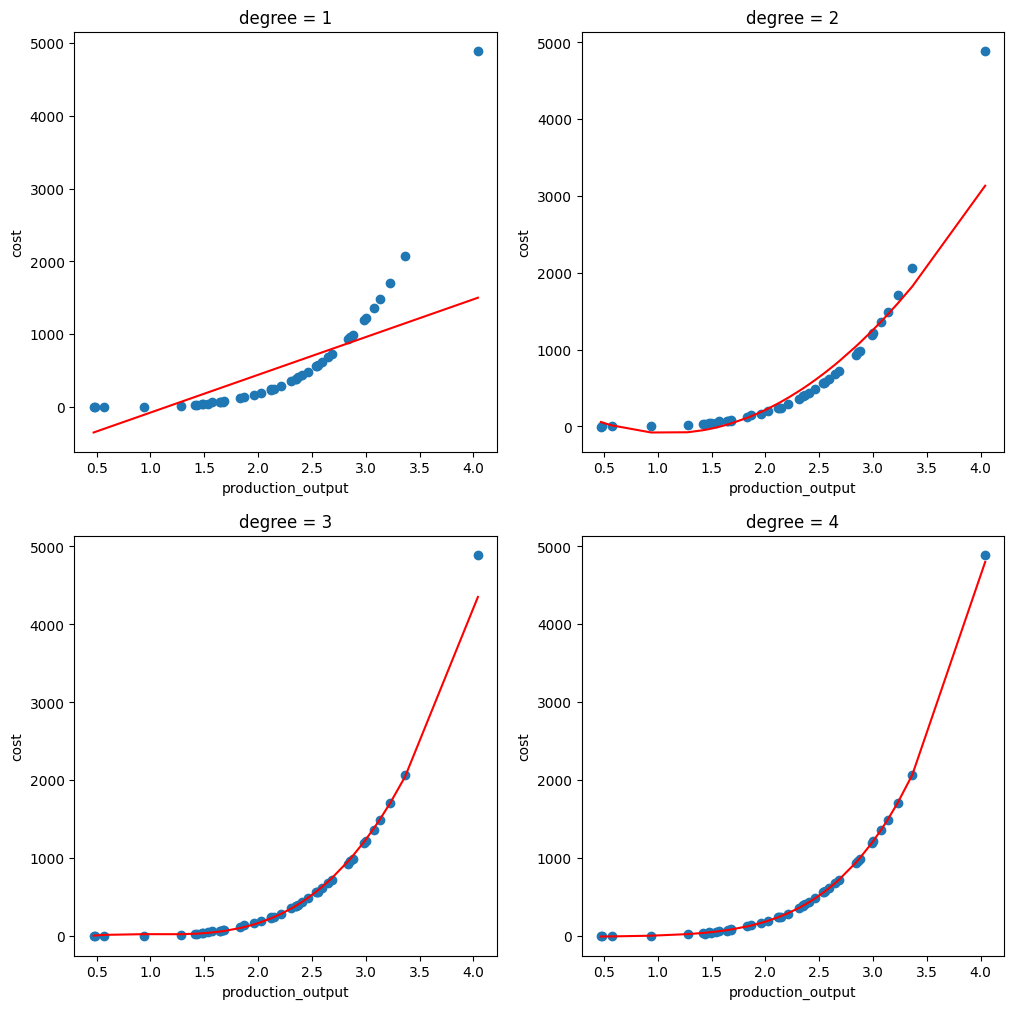

In [7]:
# split dataset
df = pd.read_csv('cost.csv')

X = df['production_output']
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# setup graph
fig, axes = plt.subplots(2,2, figsize=(12,12))
axes = axes.flatten()

for deg in range(1, 5):
    # do poly regression
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
    predicted = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))

    # get rmse and r2
    mse = mean_squared_error(y_test,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,predicted)

    print(f'RMSE(degree = {deg}): {round(rmse, 4)}')
    print(f'R2(degree = {deg}): {round(r2, 4)}')

    # sort the line of best fit
    df_new = pd.DataFrame(predicted,columns=['predicted'])
    df_new["production_output"] = np.array(X_test)
    df_new['ytest'] = np.array(y_test)
    df_new = df_new.sort_values(by='production_output')

    # get graph
    x = np.linspace(0, 130, 130)
    y = plr.predict(poly.transform(np.asarray(x).reshape(-1, 1)))
    
    axes[deg - 1].plot(df_new.production_output, df_new.predicted,color='red')
    axes[deg - 1].scatter(df_new.production_output,df_new['ytest'])
    axes[deg - 1].set_title(f'degree = {deg}')
    axes[deg - 1].set_xlabel('production_output')
    axes[deg - 1].set_ylabel('cost')

plt.show()

**The model of degree 4 seems to provide the most appropriate prediction because the RMSE is lowest while not overfitting.**

# 4

In [46]:
df = pd.DataFrame({
    'Weight x1': (x1 := np.array([7.0, 6.0, 8.0])),
    'Length x2': (x2 := np.array([50, 55, 56])),
    'Actual Height y': (y := np.array([5.80, 5.70, 6.00]))
})

df['Predicted Height ŷ'] = (y_hat := 0.1 * x1 + 0.1 * x2)
df['Squared Residual (y - ŷ)^2'] = (squared_residual := (y - y_hat) ** 2)

sigma_squared = 1 # we are assuming normal distribution

df['Log Likelihood'] = (log_likelihood := 
                        np.round(
                            np.log10(1 / np.sqrt(2 * np.pi * sigma_squared)
                                   * np.e ** (-squared_residual / (2 * sigma_squared))
                                  ),
                            4)
                       )

print('Total Log-Likelihood =', np.round(np.sum(log_likelihood), 4))
df

Total Log-Likelihood = -1.2689


,Weight x1,Length x2,Actual Height y,Predicted Height ŷ,Squared Residual (y - ŷ)^2,Log Likelihood
0,7.0,50,5.8,5.7,0.01,-0.4013
1,6.0,55,5.7,6.1,0.16,-0.4338
2,8.0,56,6.0,6.4,0.16,-0.4338
